In [1]:
import visualkeras

#Import relevant libraries
import numpy as np
import pandas as pd
import os
from PIL import Image
import csv


from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')

In [2]:
#this works as long as it is inside code/
train_path = "/".join(os.getcwd().replace("\\", "/").split("/")[:-1]) + "/archive/train/"
test_path = "/".join(os.getcwd().replace("\\", "/").split("/")[:-1]) + "/archive/test/"
images_path = "/".join(os.getcwd().replace("\\", "/").split("/")[:-1]) + "/archive/"

classes = os.listdir(train_path)

images = []
labels = []

#Read csv file
with open(images_path + 'Train.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    headers = next(csv_reader, None)

    for row in csv_reader:
        # Se quiser limitar a quantidade de imagens
        if np.random.rand(1) < 0.9:
            continue

        img = Image.open(images_path + row[-1])

        #Crop image (This is given in the file, not calculated)
        img = img.crop((int(row[2]), int(row[3]), int(row[4]), int(row[5])))

        #needs to resize
        img = img.resize((30, 30))

        #Convert image to grayscale
#         img = img.convert('L')

        #Convert image to numpy array (Feature Extraction)
        img = np.array(img)#.flatten()
        # img.reshape(img.shape[0], 1)

        #Append image to list
        images.append(img)

        #Append label to list
        labels.append(np.uint8(row[6]))

X = np.array(images)
y = np.array(labels)
y = y.reshape(y.shape[0], 1)

#Split dataset, mantaining the proportion of samples in each class
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=68, stratify=y)


# CNN1

In [3]:
def CNN1(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    # BLOCK 1: CONV -> BN -> RELU -> MAXP
    X = Conv2D(32, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv0')(X)

    X = MaxPooling2D(pool_size=(2, 2), name='max_pool')(X)

    # Dropout offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and improve generalization error in deep neural networks of all kinds.
    X = Dropout(0.2)(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(256, activation='relu')(X)
    X = Dropout(0.3)(X)
    X = Dense(43, activation='softmax')(X)

    # Create model.
    model = Model(inputs = X_input, outputs = X, name='CNN1')

    return model

In [4]:
# Create the model
cnn1 = CNN1(X_train.shape[1:])

# Compile model
cnn1.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# CNN model summary

cnn1.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 30, 3)]       0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 36, 36, 3)        0         
 2D)                                                             
                                                                 
 conv0 (Conv2D)              (None, 34, 34, 32)        896       
                                                                 
 max_pool (MaxPooling2D)     (None, 17, 17, 32)        0         
                                                                 
 dropout (Dropout)           (None, 17, 17, 32)        0         
                                                                 
 flatten (Flatten)           (None, 9248)              0         
                                                              

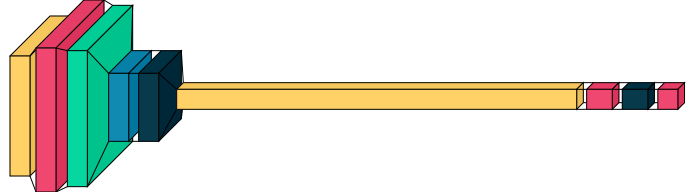

In [6]:
visualkeras.layered_view(cnn1)

# CNN3

In [7]:
def CNN3(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    # BLOCK 1: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(32, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv0')(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.25)(X)

    # BLOCK 2: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(64, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv1')(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.25)(X)

    # BLOCK 3: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(128, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv2')(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.4)(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(256, activation='relu')(X)
    X = Dropout(0.3)(X)
    X = Dense(43, activation='softmax')(X)

    # Create model.
    model = Model(inputs = X_input, outputs = X, name='CNN1')

    return model

In [8]:
# Create the model
cnn3 = CNN3(X_train.shape[1:])

# Compile model
cnn3.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# CNN model summary

cnn3.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 30, 30, 3)]       0         
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 36, 36, 3)        0         
 ng2D)                                                           
                                                                 
 conv0 (Conv2D)              (None, 34, 34, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 32)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 17, 17, 32)        0         
                                                                 
 conv1 (Conv2D)              (None, 15, 15, 64)        18496  

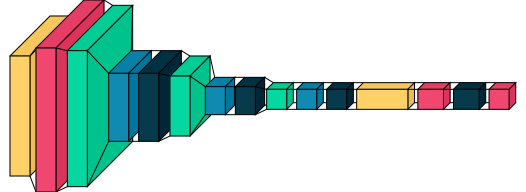

In [10]:
visualkeras.layered_view(cnn3)

# CNN3_2

In [11]:
def CNN3_2(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    # BLOCK 1: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(32, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)

    # BLOCK 2: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(64, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)

    # BLOCK 3: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(128, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(256, activation='relu')(X)
    X = BatchNormalization()(X)
    X = Dense(43, activation='softmax')(X)

    # Create model.
    model = Model(inputs = X_input, outputs = X, name='CNN1')

    return model

In [12]:
# Create the model
cnn3_2 = CNN3_2(X_train.shape[1:])

# Compile model
cnn3_2.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# CNN model summary

cnn3_2.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30, 30, 3)]       0         
                                                                 
 zero_padding2d_2 (ZeroPaddi  (None, 36, 36, 3)        0         
 ng2D)                                                           
                                                                 
 conv0 (Conv2D)              (None, 34, 34, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 34, 34, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                              

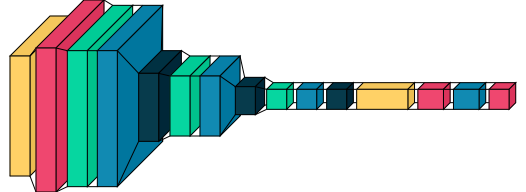

In [14]:
visualkeras.layered_view(cnn3_2)

# CNN3_3

In [15]:
def CNN3_3(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    # BLOCK 1: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(32, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.5)(X)

    # BLOCK 2: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(64, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.5)(X)

    # BLOCK 3: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(128, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.5)(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(256, activation='relu')(X)
    X = BatchNormalization()(X)
    X = Dense(43, activation='softmax')(X)

    # Create model.
    model = Model(inputs = X_input, outputs = X, name='CNN1')

    return model

In [16]:
# Create the model
cnn3_3 = CNN3_3(X_train.shape[1:])

# Compile model
cnn3_3.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# CNN model summary

cnn3_3.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 30, 30, 3)]       0         
                                                                 
 zero_padding2d_3 (ZeroPaddi  (None, 36, 36, 3)        0         
 ng2D)                                                           
                                                                 
 conv0 (Conv2D)              (None, 34, 34, 32)        896       
                                                                 
 batch_normalization_4 (Batc  (None, 34, 34, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                              

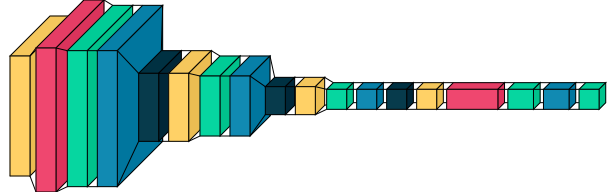

In [18]:
visualkeras.layered_view(cnn3_3)

# CNN4_1

In [19]:
def CNN4_1(input_shape):
    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    # BLOCK 1: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(32, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization()(X)

    X = Conv2D(32, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.25)(X)

    # BLOCK 2: CONV -> RELU -> MAXP -> DROPOUT
    X = Conv2D(64, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv2')(X)
    X = BatchNormalization()(X)
    X = Dropout(0.25)(X)

    X = Conv2D(128, kernel_size=(3, 3), activation='relu', strides = (1, 1), name = 'conv3')(X)
    X = BatchNormalization()(X)
    X = MaxPooling2D(pool_size=(2, 2))(X)
    X = Dropout(0.25)(X)

    X = Flatten()(X)

    X = Dense(512, activation='relu')(X)
    X = BatchNormalization()(X)
    X = Dropout(0.5)(X)

    X = Dense(256, activation='relu')(X)
    X = BatchNormalization()(X)
    X = Dropout(0.5)(X)

    X = Dense(43, activation='softmax')(X)

    # Create model.
    model = Model(inputs = X_input, outputs = X, name='CNN1')

    return model

In [20]:
# Create the model
cnn4_1 = CNN4_1(X_train.shape[1:])

# Compile model
cnn4_1.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# CNN model summary

cnn4_1.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 30, 30, 3)]       0         
                                                                 
 zero_padding2d_4 (ZeroPaddi  (None, 36, 36, 3)        0         
 ng2D)                                                           
                                                                 
 conv0 (Conv2D)              (None, 34, 34, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 34, 34, 32)       128       
 hNormalization)                                                 
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128    

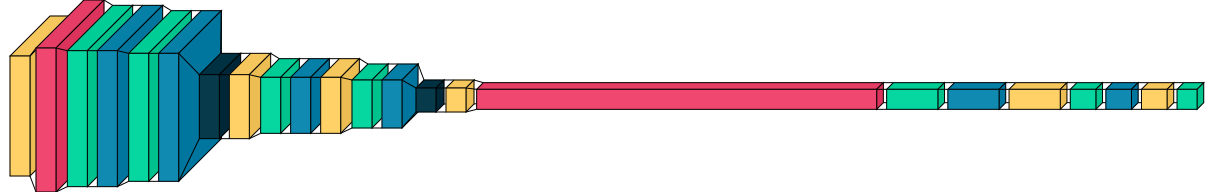

In [22]:
visualkeras.layered_view(cnn4_1)